# Welcome to Introduction to Deep Learning with Tensorflow Workshop
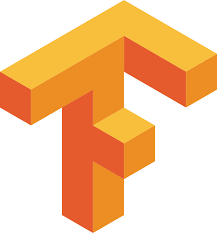
<br/>
In this Workshop, we will be learning about TensorFlow and how to create a deep learning model.

### What is TensorFlow?
TensorFlow is a software library developed by google to help in machine learning. It allows developers to create dataflow graphs—structures that describe how data moves through a graph, or a series of processing nodes.

Tensor is a multi-dimensional arrays of number which represents the data. Tensors flow through between operations and generate and output hence the name TensorFlow.

## Libraries
To start off, we will need to import tensorflow library. We also use the keras API

In tensorflow, we have many available libraries and that we reduce the need of setting up the environment on our local machine to install tensorflow. 

In [ ]:
import tensorflow as tf
from tensorflow import keras

In Traditional programming, we use the data given and the rules defined by us to get the desired output.

In Machine learning, we will make use of data and the output of the data to create the rules. We use these rules later to predict the output using the data given. 

![alt text](https://www.bouvet.no/bouvet-deler/6-tips-for-getting-started-with-machine-learning/_/attachment/inline/8469beef-45b3-494b-a68a-2f19948844de:7222f3d165f068511023e7a1e4b817621ae17995/Screen%20Shot%202018-09-20%20at%2009.16.16.png)

### 'Hello World' of Neural Network
Below is a code to create a neural network which predicts y value for the given x value

To get started, we first define a model

In [ ]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In the above line Sequential defines the simplest model which constitutes of linear stack of layers. In our example, we have only one layer (Dense layer)

In the dense layer, we have units=1 which means there is only one neuron and input_shape = [1] which means it intakes only one value.

In [ ]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

Compile defines loss function and optimizer function which is used while training the model

In [ ]:
import numpy as np
x = np.array([-2,-1,0,1,2,3,4], dtype = 'float')
y = np.array([-3,-1,1,3,5,7,9], dtype = 'float')

model.fit(x, y, epochs = 75) # the model is trained over 75 epochs using x and y 

Epoch 1/75
1/1 [==============================] - 0s 1ms/step - loss: 9.7052
Epoch 2/75
1/1 [==============================] - 0s 738us/step - loss: 7.8441
Epoch 3/75
1/1 [==============================] - 0s 768us/step - loss: 6.3505
Epoch 4/75
1/1 [==============================] - 0s 2ms/step - loss: 5.1514
Epoch 5/75
1/1 [==============================] - 0s 813us/step - loss: 4.1885
Epoch 6/75
1/1 [==============================] - 0s 669us/step - loss: 3.4148
Epoch 7/75
1/1 [==============================] - 0s 919us/step - loss: 2.7930
Epoch 8/75
1/1 [==============================] - 0s 672us/step - loss: 2.2929
Epoch 9/75
1/1 [==============================] - 0s 2ms/step - loss: 1.8904
Epoch 10/75
1/1 [==============================] - 0s 820us/step - loss: 1.5662
Epoch 11/75
1/1 [==============================] - 0s 2ms/step - loss: 1.3047
Epoch 12/75
1/1 [==============================] - 0s 692us/step - loss: 1.0937
Epoch 13/75
1/1 [==============================] - 0s 782

x = [-2,-1,0,1,2,3,4] <br/>
y = [-3,-1,1,3,5,7,9]

As you can observe from the given data, y = 2x + 1. We have now used the data and trained a model using tensorflow. Lets see how accurate are the predictions 

In [ ]:
print(model.predict([5])) # y = 2 * 5 + 1 = 11


[[11.037718]]


As you can see from the prediction, we got answer which is very close to the actual answer but its not the same. The reason for this is due to less data provided and the fact that neural networks deal in probability.

### Exercise 1 : Put a ring on it 




You want to buy a ring for yourself. You enter a store and they tell you the costing method of the ring. It costs 500 dollars to make the ring and it costs an extra 100 dollars for adding one diamond to the ring. So it would cost 600 dollars for a ring with 1 diamond and 1100 dollars for a ring with 6 diamonds. Create a model which takes an input for number of diamonds and outputs the cost

Hint:<br/>
1) use a small scale value(have your output in terms of thousands of dollars)<br/>
2) Bigger the dataset, better the prediction<br/>
3) In this case, number of epochs will improve your prediction but it leads to overfitting (we will discuss this later in the workshop) 

In [ ]:
xs= #YOUR CODE HERE
ys= #YOUR CODE HERE
model = #YOUR CODE HERE
model.compile( #YOUR CODE HERE )
model.fit( #YOUR CODE HERE )

After creating your model, check your answer with the code given below

In [ ]:
print(model.predict([0]))
print(model.predict([5]))
print(model.predict([10]))

## Computer Vision using Neural Networks
In this part of the workshop, we will be working on the MNIST dataset which consists of images of digits 0 to 9.

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(training_images))
print(len(test_images))
#60000
#10000

60000
10000


2
(28, 28)


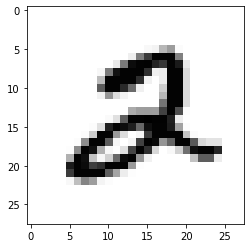

In [ ]:
import matplotlib.pyplot as plt
image_index = 5 # You may select anything up to 60,000
print(training_labels[image_index]) # The label is 8
print(training_images[image_index].shape) # The image is 28 x 28 pixels
plt.imshow(training_images[image_index], cmap='Greys')

#### Pre-processing data
Before we create our model, we need to normalize our image data and make sure all the images are of the same shape. If any of the images are in a different format, our model will give an error.

We normalize our data by dividing all the pixel values by 255.0 . This is because the values for the pixels varies from 0-255. Normalizing the pixel value makes calculations easier for the model, therefore reducing the computation time.

In [ ]:
#normalize the images
training_images = training_images/ 255.0
test_images = test_images/ 255.0

#reshape the images
training_images = training_images.reshape((training_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation = 'relu'),
                            tf.keras.layers.Dense(10, activation = 'softmax')])

While creating this model, we use a Flatten layer to take the matrice as an input and make it into an 1D list. This 1D list then goes through a neural network whose first layer has 128 nodes and second layer has 10 nodes.

We have come across a new term called activation. It helps us define an activation function which is applied to the output of a neural network layer, which is then passed as the input to the next layer. There are several types of activation functions:
 - relu - if input x > 0 return x, else return 0
 - softmax - takes a set of values and picks the biggest value. eg - input [1,2,1,5,8,3,4,6,3] , output = [0,0,0,0,1,0,0,0,0]
 - sigmoid - returns 1/(1+exp(-x)) - used in binary classification
 - tanh - returns tan(x)
 - linear - returns m*x + c where m and c are weights changed while fitting the model
 - exponential - returns exp(x)
 - softplus - returns log(exp(x)+1)
 - softsign - returns x/(abs(x)+1)

 For this workshop, we will be using only relu, softmax and sigmoid.



We will be using adam as the optimizer. There are different types of optimizers which can be beneficial in different scenarios. 

Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks. 

The learning rate of your optimizer changes over time

In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model.compile(optimizer = adam,
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

The amount that the weights are updated during training is referred to as the step size or the “learning rate.” If the value is too high, it will lead to over-fitting and if its too low, it will take more epochs to train the model.

In the statement, we are fitting the model using only are training images and training labels. We are going to run it through 3 epochs and see the results

In [ ]:
history = model.fit(training_images, training_labels, epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2635 - accuracy: 0.9248
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1178 - accuracy: 0.9649
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0805 - accuracy: 0.9756
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0605 - accuracy: 0.9818
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0465 - accuracy: 0.9860
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0377 - accuracy: 0.9886
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9911
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0234 - accuracy: 0.9927
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.014

Let's make prediction using our test set to check if the predictions are correct. We can see that when we get the prediction for an image from a model, it returns a list of float numbers. These numbers signify the probability of the image being that specific category. To find the category, we find the index of the biggest number in the list.



In [ ]:
import numpy as np
image_no =384
pred = model.predict(test_images)
print(pred[image_no])
print(np.argmax(pred[image_no]))
print(test_labels[image_no])

[1.5563911e-18 9.2812926e-22 4.9453096e-20 2.3670656e-25 1.0808653e-24
 4.5372839e-16 1.0000000e+00 6.8160918e-27 9.1691444e-21 7.7248510e-20]
6
6


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1298 - accuracy: 0.9756


[0.12975753843784332, 0.975600004196167]

### Model Evaluation

![alt text](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvNWUoWieQqaGmU_gl9%2F-LvNoby-llz4QzAK15nL%2Fimage.png?alt=media&token=41720ce9-bb66-4419-9bd8-640abf1fc415)

**Optimum fitting**- Good fitting for a model. What we want our model to be.

**Underfitting**- Case where the model has not learned enough from the training data. This results in low generalizations and unreliable predicition.

Reasons for underfitting of data:
1.   Model is not able to capture the underlying trend of the data.
2.   The features are not sufficient to train the model.
3. and more....





**Overfitting**- Case where the overall loss is really small for the training data, but the generalization of the model is unreliable. Overfitting is like a human mugging up a concept instead of understanding it.

Reasons for overfitting of data:


1.   Noise in the data is used as a feature, this created misleading models leading to inaccurate prediction.
2.   Some neurons have a very high weight which makes the whole model rely on only a few certain features and the other features are not used well.
3.   The model is too complex

An example for overfitting is given below. In this example, we overfit the model by running too many epochs. 

This leads to the model memorizing the values for the given data and it doesnt perform well with new data


In [ ]:
over_model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation = 'relu'),
                            tf.keras.layers.Dense(10, activation = 'softmax')])
 
adam = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
over_model.compile(optimizer = adam,
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
 
train_acc = []
train_loss = []
test_acc = []
test_loss = []
 
for i in range(20):
  history = over_model.fit(training_images, training_labels)
  train_acc.append(history.history['accuracy'])
  train_loss.append(history.history['loss'])
  values = over_model.evaluate(test_images,test_labels)
  test_acc.append(values[1])
  test_loss.append(values[0])

313/313 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.9464


20


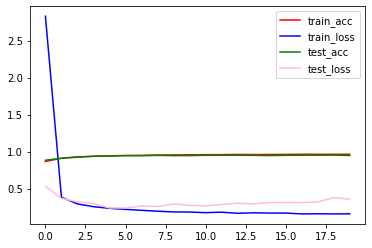

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
print(len(train_acc))
plt.plot(range(20),train_acc,color = 'red')
plt.plot(range(20),train_loss,color = 'blue')
plt.plot(range(20),test_acc,color = 'green')
plt.plot(range(20),test_loss,color = 'pink')
plt.gca().legend(('train_acc','train_loss','test_acc','test_loss'))
plt.show()

#### Preventing overfitting

We are going to prevent overfitting using dropout layer.

Dropout prevents overfitting. In overfitting, the model relys on only a few features. Dropout allows us to spread out the weights for all the neurons, making good use of all the features given to us. Dropout removes a few neurons from a specific layer during model fitting. The neurons are removed randomly. This allows the neurons to have a spread out weights.

The code for dropout is given below

In [ ]:
drop_model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation = 'relu'),
                            tf.keras.layers.Dropout(0.25),
                            tf.keras.layers.Dense(10, activation = 'softmax')])

In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
drop_model.compile(optimizer = adam,
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
train_acc = []
train_loss = []
test_acc = []
test_loss = []

for i in range(20):
  history = drop_model.fit(training_images, training_labels)
  train_acc.append(history.history['accuracy'])
  train_loss.append(history.history['loss'])
  values = drop_model.evaluate(test_images,test_labels)
  test_acc.append(values[1])
  test_loss.append(values[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.3238 - accuracy: 0.9483


20


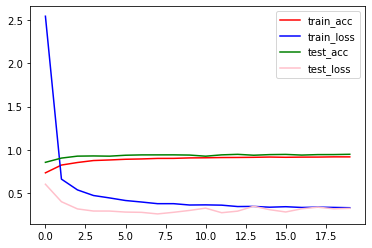

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
print(len(train_acc))
plt.plot(range(20),train_acc,color = 'red')
plt.plot(range(20),train_loss,color = 'blue')
plt.plot(range(20),test_acc,color = 'green')
plt.plot(range(20),test_loss,color = 'pink')
plt.gca().legend(('train_acc','train_loss','test_acc','test_loss'))
plt.show()

## Convolutional Neural Networks
In this part of the workshop, we will be learning about convolutional layer, pooling layer and how it plays a part in image classification. 

Convolutional layer helps us identify relation between the pixel and its surrounding pixels. 

![alt text](https://miro.medium.com/max/654/1*hy15RJHCqT4HzO2VUydjTw.png)
<br/>
In the example given above, the convolutional layer creates a 3 X 3 filter which is labeled as K. This filter is used on the original image to find the relation between the pixels by applying the filter for every set of of pixel. In this example, the filter is multiplied to the original image pixel and then the values are added to give a new 2D array. Convolutions can be performed multiple times and can have different dimensions to improve the models prediction.






Pooling layer reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. While using the pool layer, we need to make sure that we reduce the size to help in computation without losing important features which will help in classification. 

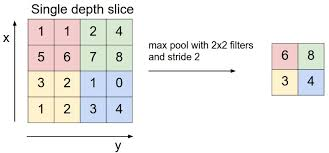

In the example given above, max pooling with 2 x 2 filter is used to find the largest number in 2x2 filter and create a smaller 2D array for computation

For computer vision, we are going to use couple of convolutional and pooling layers to compute the data and then flatten this data into a 1D array. After flattening it, we use dense layer to compute the data and find the image classification. 

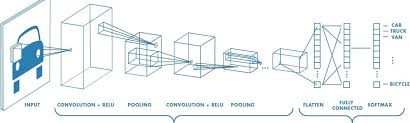

### Creating convolutional and pooling layers

In the code given below, we have created one convolutional layer and one max pooling layer.

In the convolutional layer, we have created 64 filter of the size 3x3 which are used to compute the images (which are 2D lists). We have to specify the input shape for the first later which is 28 x 28 with our dataset. There is a third entry in the input shape which signifies the total number of bytes for the image. As our image is black and white, we use only one byte but for image whereas for coloured images, we use 3 bytes therefore the entry should be changed to 3 if we are using a dataset with colored images

In the max pooling layer, we are just providing the size of the size of the filter.

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28,28,1)),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation = 'relu'),
                            tf.keras.layers.Dense(10, activation = 'softmax')])

You may have observed that we have used a flatten layer in the middle of the model. This is because when the image is sent to our model, it is firsted computed through convolutional and max pooling layers which are 2D layers. After being computed in these layers, we flatten the data into a 1D list which is then computed through the dense layers and an output is generated.

In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model.compile(optimizer = adam,
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


Model.summary() tells us about the output shape of each layers and how many parameters are trained in total. This helps us understand how the data is flowing through our neural network. 

In the first layer, we take an input size of 28 x 28 and generate an output of 26 x 26. This is because our convolutional layer has a filter size of 3 x 3. So it takes 3 x 3 pixels from left to write and computes them one by one. After computing 28 x 28 layer with a 3 x 3 filter, an output of size 26 x 26 is generated. As we have used 64 filters, we have generated 64 outputs of size 26 x 26. 

In ther second layer, we perform max pooling which takes 2 x 2 pixels form the image and finds the maximum value. This reduces the output image size to 13 x 13

After the second layer, we pass this data through the flatten layer which then allows this data to go through the dense layer and provide us with an output.

### Exercise 2 : Sort the clothes


Create a convolutional neural network to classify images of the Fashion MNIST dataset.

[Fashion-MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.

Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [ ]:
from keras.datasets import fashion_mnist
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout)
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

**Load dataset**

In [ ]:
#load data from fashion_mnist into sets for training and testing
#YOUR CODE HERE

#assign names to labels
class_names={0:'top', 1:'trouser', 2:'pullover', 3:'dress', 4:'coat', 5:'sandal', 6:'shirt', 7:'sneaker', 8:'bag', 9:'boot'}

#visualize data
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Pre-process data** 

In [ ]:
#normalize the images
#YOUR CODE HERE

#reshape the images
#YOUR CODE HERE

**Build model**

In [ ]:
model = #YOUR CODE HERE

**Train model**

In [ ]:
model.compile(optimizer = adam, loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit("""YOUR CODE HERE""")

**Evaluate perfomance**

In [ ]:
loss, acc = #YOUR CODE HERE
print("Training : loss={:.3f} - acc={:.3f}".format(loss, acc))

loss, acc = #YOUR CODE HERE
print("Test : loss={:.3f} - acc={:.3f}".format(loss, acc))

**Improve model**

If you observed over-fitting, improve your model by using regularization.

NOTE ON DROPOUT REGULARIZATION

Dropout randomly sets the output for a given neuron to 0. In setting the output to 0, the cost function becomes more sensitive to neighbouring neurons and this changes how weights will be updated during backpropagation.

Dropout is implemented per-layer and may be implemented on any or all hidden layers in the network as well as the input layer. 

The hyperparameter specifies the probability at which outputs of the layer are dropped out/retained.

In [ ]:
model_improved = #YOUR CODE HERE 

**Re-evaluate performance**

In [ ]:
loss, acc = #YOUR CODE HERE
print("Training : loss={:.3f} - acc={:.3f}".format(loss, acc))

loss, acc = #YOUR CODE HERE
print("Test : loss={:.3f} - acc={:.3f}".format(loss, acc))

In [ ]:
#get output probabilities and select class name
predictions = #YOUR CODE HERE

#visualize predictions 
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap='binary')
    actual_class=class_names[test_labels[i]]
    if predictions[i]==test_labels[i]:
      plt.xlabel(actual_class, color='green')
    else:
      plt.xlabel(actual_class, color='red')
plt.show()


### Exercise 3 : Want to watch a movie this weekend?


Create a model to categorise movie reviews of the [IMDB dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

This is a dataset of highly-polarized movies reviews from IMDB labeled by binary sentiment (1 for positive and 0 for negative), consisting of 25000 training examples and 25000 testing examples.

Reviews have been preprocessed, and each review is encoded as a list of word indices (integers). Words are indexed by overall frequency in the dataset, for instance the integer "3" encodes the 3rd most frequently occuring word. 

NOTE ON WORD INDICES

The encoding is actually offset because of reserved indices 0, 1 and 2.


**Load dataset**

[Check the reference doc here](https://keras.io/api/datasets/imdb/)

In [ ]:
from keras.datasets import imdb
#load data, using 10000 for num_words parameter
#YOUR CODE HERE

#merge training examples and testing examples, so that we can change from 50/50 to 80/20 split distribution
data = #YOUR CODE HERE
targets = #YOUR CODE HERE

In [ ]:
#try exploring the data at your own time

**Pre-process data**

The whole dataset contains 9,998 unique words.

You can’t feed lists of integers into a neural network, so we will vectorize every review into a 10,000-dimensional vector. 

For instance, the sequence [3, 5] will be turned into a 10,000-dimensional vector with all zeros except at indices 3 and 5, which would be ones.

Now we can use as the first layer in your network a dense layer, capable of handling floating-point vector data.

Don't forget to split data into 80/20 for training/testing!

In [ ]:
#to visualize predictions later, keep a copy of non-vectorized test examples
check_x = data[:10000]
check_y = targets[:10000]

def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

#vectorize reviews and labels
data = #YOUR CODE HERE 
targets = np.array(targets).astype("float32")

#first 10K reviews for testing
#YOUR CODE HERE

#last 40K reviews for training
#YOUR CODE HERE 

**Build model**


In [ ]:
model = #YOUR CODE HERE

**Train model and evaluate performance**

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

results = model.fit('''YOUR CODE HERE''', validation_data = ('''YOUR CODE HERE'''))

print("Test-Accuracy:", np.mean(results.history["accuracy"]))

In [ ]:
#the get_word_index function retrieves a dictionary mapping words to their index in the dataset
index = imdb.get_word_index()     
reverse_index = dict([(value, key) for (key, value) in index.items()]) 

#to read the review
#note that indices were offset by 3, because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown"
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in check_x[0]] )
print(decoded)

**Predict**

In [ ]:
#binary classification
sentiment = {1: 'positive', 0:'negative'}

#get output probabilities 
predictions = #YOUR CODE HERE

predictions = np.round(predictions).astype('int64')
print("predicted: ", sentiment[predictions[0][0]])
print("actual: ", sentiment[check_y[0]])

# Jupyter Notebook option for Tensorflow

In [ ]:
pip install tensorflow 
# locally installs tensorflow

# Biblography


*   TensorFlow Official Website - https://www.tensorflow.org/
*   Introduction to Tensorflow for AI, ML and DL by Deeplearning.ai - https://www.coursera.org/learn/introduction-tensorflow
*   What is Tensorflow? by Python Programmer - https://www.youtube.com/watch?v=UbMDK4UNtPA&t=38s
* A Gentle Introduction to Dropout for Regularizing Deep Neural Networks by Jason Brownlee - https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/


## Keras Documentation
* Built-in datasets - https://keras.io/api/datasets/
* Models - https://keras.io/api/models/model/ and https://keras.io/api/models/sequential/#sequential-class
* Layers - https://keras.io/api/layers/

